# Project 3: Diffraction

In [1]:
import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands
from matplotlib.colors import LinearSegmentedColormap

from scipy.fftpack import fft2, fftshift

import scipy         # Another numerical library
from scipy import integrate

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

### Introduction

<!-- In this project, we will study diffraction using two-dimensional Fourier techniques.  -->
Recall from the class that when a wave goes through an aperture, it undergoes diffraction. When this diffracted wave hits a screen that is perpendicular to the aperture, the diffraction pattern can be observed. If the screen is far away from the aperture, the complex amplitude of the field on the screen is

$$
E_\mathrm{diff}\left(x,y\right) \approx \frac{1}{\lambda D} \int d\mathbf{a}'
 e^{-i\frac{k}{D}\left(x x' + y y'\right)} E_\mathrm{inc}\left(x',y'\right)\,,
$$
where $E_\mathrm{inc}\left(x',y'\right)$ is the complex field amplitude at the plane of the aperture and $D$ is the distance between the aperture and the screen where $E_\mathrm{diff}\left(x,y\right)$ is observed.

<!-- A mirror can be regarded as an aperture. Instead of the incident field $E_\mathrm{inc}\left(x,y\right)$, we will use the aperture function $A\left(x,y\right)$ in the expression above. For a perfect optical telescope with a circular mirror, $A(x, y) = 1$, for $r < R$ and $A = 0$ otherwise, where $R$ is the telescope radius and $r^2 = x^2 + y^2$. The diffraction pattern is then the well-known Airy pattern. -->

<!-- In practice, a telescope has a more complicated aperture function because of errors in the manufacturing or the gravitational deformation of the surface. In addition, the aperture function may not have constant amplitude. Radio antennas will often use a tapered aperture function, such that $|A\left(x, y\right)| = \exp\left(−r^2 /(2\sigma_T^2 )\right)$ where the length $\sigma_T$ is a design parameter: this is called Gaussian illumination of the aperture. -->



### Question 1

For this project, we will be analyzing different appertures. A general aperture function will be given by ```Aperture(x, y)```. So, it is useful to start by writing a function that takes ```Aperture(x, y)```, $k$, $D$, the size of the screen hosting the aperture, and number of points on the 2D grid and returns the field on the screen position beyond the aperture. Start by writing ```E_Fields(Aperture, k, D, screen_size, nPts)``` which returns the aperture grid, the aperture signal, the target grid, and the target signal.

In [8]:
def E_Fields(Aperture, k, D, screen_size, nPts):
    vAperture = np.vectorize(Aperture)
    
    # half_screen = screen_size / 2
    grid = np.mgrid[-screen_size:screen_size:1j * nPts, -screen_size:screen_size:1j * nPts]
    E_Inc = vAperture(grid[0], grid[1])

    # smallest_spacing = 2 * np.pi / (2 * screen_size)

    step_size = 2 * np.pi * D / (screen_size * k)
    target_size = step_size * nPts
    
    # target_size = 2 * np.pi / (screen_size * k) * nPts
    target_grid = np.mgrid[-target_size:target_size:1j * nPts, -target_size:target_size:1j * nPts]

    lamda = 2 * np.pi / k
    E_Diff = (1 / (lamda * D)) * fftshift(fft2(E_Inc)) 
    
    return grid, E_Inc, target_grid, E_Diff

k = 2pi/lambda

step-size = 2pi * D / s * k 
screen_size = step_size * nPts

### Question 2

As a start, let's make sure things work as they should. To this end, consider a green light with wavelength $\lambda = 550$nm. Let the aperture be an evenly illuminated circle of radius 1mm. Create a pair of 2D plots showing the aperture and the diffracted pattern on the target screen. It is up to you how far you position the screen, but remember that it has to be positioned at a distance that is substantially larger than $\pi R^2 / \lambda$, where $R$ is the aperture radius. **Think about reasonable values here!**. Recall that $k = 2\pi / \lambda$. **Be careful with the units!!!**

Start be writing ```Aperture(x, y, R)``` and then use the function you wrote above to obtain the results. Play with the scale of the final plot to make sure the results are clear.

When you plot the **absolute value** of the diffracted result, you should observe a set of concentric circles, known as the Airy pattern. Comment on your results.

**SUGGESTION:** Divide your diffracted pattern by ```nPts**2``` to prevent the numbers from getting huge.

In [23]:
def Aperture(x, y, R):
    return 1 if np.sqrt(x**2 + y**2) < R else 0

R = 1e-3
lamda = 550e-9
k = 2 * np.pi / lamda
D = 1e3 * np.pi * R**2 / lamda

screen_size = 3e-2
nPts = 1000

Aperture_with_R = lambda x, y: Aperture(x, y, R)
aperture_grid, E_Inc, target_grid, E_Diff = E_Fields(Aperture_with_R, k, D, screen_size, nPts) 

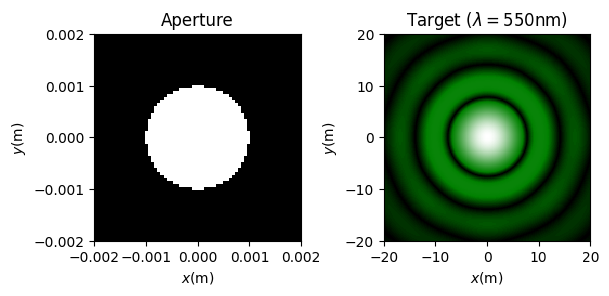

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)

green_colors = [(0, "black"), (0.1, "green"), (1, "white")]
green_cmap = LinearSegmentedColormap.from_list("green", green_colors)

ax1_lim = 2 * R
ax1.pcolormesh(aperture_grid[0], aperture_grid[1], E_Inc, cmap = green_cmap)
ax1.set(title = "Aperture", xlabel = "$x$(m)", ylabel = "$y$(m)",
        xlim = [-ax1_lim, ax1_lim], ylim = [-ax1_lim, ax1_lim])
ax1.set_aspect("equal")

ax2_lim = 20
pc = ax2.pcolormesh(target_grid[0], target_grid[1], (np.abs(E_Diff) / nPts**2), cmap = green_cmap)
# fig.colorbar(pc) 
ax2.set(title = "Target ($\lambda = $550nm)", xlabel = "$x$(m)", ylabel = "$y$(m)",
        xlim = [-ax2_lim, ax2_lim], ylim = [-ax2_lim, ax2_lim])
ax2.set_aspect("equal")

plt.subplots_adjust(wspace = 0.4)

### Question 3

Repeat the plots above for $\lambda = 650$ nm and $\lambda = 450$ nm. Keep $D$ the same as you used above. What colors do these wavelengths correspond to? How does your diffracted pattern change?

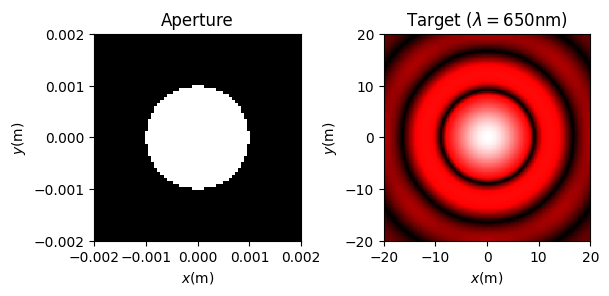

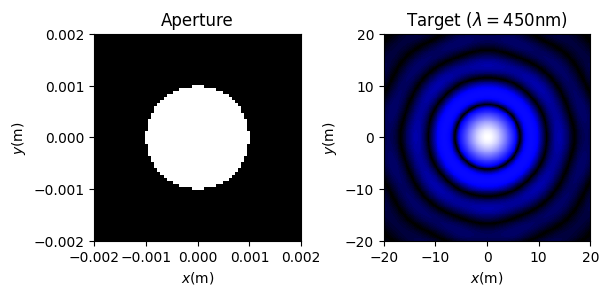

In [32]:
lambdas = [650e-9, 450e-9]
ks = 2 * np.pi / np.array(lambdas)

lambda_headings = ["650nm", "450nm"]
red_colors, blue_colors = [(0, "black"), (0.1, "red"), (1, "white")], [(0, "black"), (0.1, "blue"), (1, "white")]
red_blue_cmaps = LinearSegmentedColormap.from_list("red", red_colors), LinearSegmentedColormap.from_list("blue", blue_colors)

for i, k in enumerate(ks):
    aperture_grid, E_Inc, target_grid, E_Diff = E_Fields(Aperture_with_R, k, D, screen_size, nPts)

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1_lim = 2 * R
    ax1.pcolormesh(aperture_grid[0], aperture_grid[1], E_Inc, cmap = red_blue_cmaps[i])
    ax1.set(title = "Aperture", xlabel = "$x$(m)", ylabel = "$y$(m)",
            xlim = [-ax1_lim, ax1_lim], ylim = [-ax1_lim, ax1_lim])
    ax1.set_aspect("equal")

    ax2_lim = 20
    pc = ax2.pcolormesh(target_grid[0], target_grid[1], (np.abs(E_Diff) / nPts**2), cmap = red_blue_cmaps[i])
#     fig.colorbar(pc)
    ax2.set(title = f"Target ($\lambda = ${lambda_headings[i]})", xlabel = "$x$(m)", ylabel = "$y$(m)",
            xlim = [-ax2_lim, ax2_lim], ylim = [-ax2_lim, ax2_lim])
    ax2.set_aspect("equal")

    plt.subplots_adjust(wspace = 0.4)

### Question 4

Let us now calculate how the radius of the central bright spot of the diffracted pattern depends on $\lambda$. To establish this

- Choose a number of $\lambda$'s in the range from 400 to 700nm.
- Keeping the same setup parameters as above, calculate the corresponding diffraction patterns.
- Take a slice across $y = 0$ for each $\lambda$. Find the position of the first minimum in the signal for $x > 0$ (call it $x_*$) and record it. Plot $x_*$ vs $\lambda$. What does the plot look like?

As it turns out, there is a formula that gives the radius of the spot for this kind of diffraction: $\rho = 1.22 \lambda D / (2R)$. Do you results agree with this? Modify $R$ and $D$ to confirm. **Be careful what values you use! Don't just put random ones: make sure that the necessary relations hold!**

In [ ]:
def find_min(ls):
    for i in range (0, len(ls) - 1):
        if ls[i + 1] > ls[i]:
            return i

In [ ]:
# Airy disk/spot